In [5]:
# 출력이 너무 길어지지 않게하기 위해 찍지 않도록 했으나 
# 실제 학습 할 때는 아래 두 줄을 주석처리 하는 것을 권장한다.
import warnings
warnings.filterwarnings('ignore')

In [6]:
import pandas as pd
import numpy as np
print(pd.__version__)
print(np.__version__)
# pandas 에서 데이터 뽑고, 말뭉치를 뽑아보면 통으로 분석 못 하니까 형태소로 나누는데 나눈 거 중에
#의미 있는 게 서술어, 나 콜라 먹었다.
#뽑아 내는 거 - wordcloud, konlpy



1.1.1
1.18.5


In [7]:
# pandas 설정: 모든 row와 모든 column을 출력하게 하고, 각 column 별 출력되는 글자수는 50자 이내 글자수를 50개로 두고, head tail
pd.set_option('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', 50)

In [8]:
# 위의 설정으로 간단하게 보는 df_specific
df_specific = pd.read_csv("/Users/jupiter/Desktop/Exchange_proj/df_specific_wrangle.csv", encoding="utf-8")
df_specific.head(3)

,대학코드,대학명,gen_info,env_info,food_info,study_info,office_info,facil_info,mhct_info,help_info,etc_info
0,AR000004,Universidad del Salvador,아르헨티나의 대다수 대학교는 한국처럼 캠퍼스가 있는 것이 아니라 도시 내에 몇개의 ...,대학교가 도시 여러곳에 분포하고 있으므로 각기 다르다. 하지만 남녀를 불문하고 부에...,기숙사는 학교에서 제공하지 않고 두가지 옵션이 주어진다. 홈스테이 혹은 게스트 하우...,아르헨티나에서의 대학 수업은 주로 오전 혹은 저녁에 있다. 대부분의 학생들이 일을하...,EL SALVADOR대학교는 국제 교육부가 잘 되있는 학교이다. 아르헨티나 대학교들...,부대시설로는 헬스장이 있다고 알고 있으나 시내와 먼 곳에 있었다. 동아리는 몇가지 ...,딱히 컬쳐쇼크를 받을 만 한 요소는 없었던 것 같다. 하지만 처음에 언어적인 면에서...,"살바도르 대학교 국제처에서 비자문제나 숙소문제(홈스테이경우) 등은 해결해 주고, 특...",NaN
1,AU000019,Australian National University,"ANU has a very big campus, but unlike Yonsei, ...","The city center, called CIVIC, is 20min walk a...","There are many housing options, but I chose to...","In my personal opinions, classes are generally...","Overall, I did not have to ask for help much f...","There were many clubs for you to join at ANU, ...",I did have some culture shock during my first ...,"I was helped a lot, especially during the firs...","Overall, my stay in Australia has been nothing..."
2,AU000001,Bond University,"Bond대학교는 휴양지로 유명한 골드코스트에 위치해있습니다. 서퍼스 파라다이스, 브...",학교 주변은 조용하고 깨끗한 평화로운 전원마을의 느낌입니다. 학교에서 5분정도 걸어...,거주형태는 크게 On Campus와 Off Campus로 나뉩니다. 저는 기숙사에 ...,"수업은 보통 4개의 수업을 듣습니다. 저는 Chinese1, Australian p...",교환생활 중 국제교육부와 연락할 일은 없었습니다. 교환학생을 가서 따로 국제교육부와...,학기초에 동아리 박람회식으로 여러 동아리들의 부스가 세워집니다. 관심 있는 동아리에...,특별히 culture shock이라기 보다는 정말 다양한 문화를 접하는 것 자체가 ...,"수업관련해서는 교수님께 질문을 해도 친절하게 알려주시고, 또 교내에 과제나 발표준비...",Bond와 그 동네를 생각하면 여유롭고 평화로웠던 분위기가 아직도 생생해요. 여기서...


In [9]:
df_ranking_specific = pd.read_csv("/Users/jupiter/Desktop/Exchange_proj/df_univ_wrangled.csv", encoding="utf-8")
df_ranking_specific.head(7)

,대학코드,국가,대학명,파견구분,협정형태,NUM_VISITS,BERT_SUM,RNN_SUM,BERT_AVG,RNN_AVG,BERT_PLUS_RNN_SCORE,COLLEGE_LINK
0,AF000001,AFGHANISTAN,Kabul University,교환학생,교환대학,NaN,NaN,NaN,NaN,NaN,NaN,http://oia.yonsei.ac.kr/partner/expReport.asp?...
1,AR000001,ARGENTINA,Universidad Blas Pascal,교환학생,ISEP,NaN,NaN,NaN,NaN,NaN,NaN,http://oia.yonsei.ac.kr/partner/expReport.asp?...
2,AR000002,ARGENTINA,Universidad Catolica de Cordoba,교환학생,ISEP,NaN,NaN,NaN,NaN,NaN,NaN,http://oia.yonsei.ac.kr/partner/expReport.asp?...
3,AR000003,ARGENTINA,Universidad de Palermo,교환학생,ISEP,NaN,NaN,NaN,NaN,NaN,NaN,http://oia.yonsei.ac.kr/partner/expReport.asp?...
4,AR000004,ARGENTINA,Universidad del Salvador,교환학생,ISEP,1.0,0.0,0.399670,0.00000,0.399670,0.119901,http://oia.yonsei.ac.kr/partner/expReport.asp?...
5,AR000005,ARGENTINA,University of Buenos Aires,교환학생,교환대학,NaN,NaN,NaN,NaN,NaN,NaN,http://oia.yonsei.ac.kr/partner/expReport.asp?...
6,AU000019,AUSTRALIA,Australian National University,교환학생,교환대학,27.0,17.0,17.952732,0.62963,0.664916,0.640216,http://oia.yonsei.ac.kr/partner/expReport.asp?...


In [10]:
df_ranking = pd.read_csv("/Users/jupiter/Desktop/Exchange_proj/df_univ_ranking.csv", encoding="utf-8")
df_ranking.head(5)

,index,대학코드,국가,대학명,파견구분,협정형태,NUM_VISITS,BERT_SUM,RNN_SUM,BERT_AVG,RNN_AVG,BERT_PLUS_RNN_SCORE,COLLEGE_LINK
0,376,CH000004,SWITZERLAND,University of Lausanne,교환학생,교환대학ISEP,8.0,8.0,6.659102,1.000000,0.832388,0.949716,http://oia.yonsei.ac.kr/partner/expReport.asp?...
1,284,MX000004,MEXICO,Instituto Tecnologico y de Estudios Superiores...,교환학생,교환대학ISEP,7.0,7.0,5.665700,1.000000,0.809386,0.942816,http://oia.yonsei.ac.kr/partner/expReport.asp?...
2,415,GB000010,UNITED KINGDOM,University of Edinburgh,교환학생방문학생SAP(정규),교환대학SAF,7.0,7.0,5.607286,1.000000,0.801041,0.940312,http://oia.yonsei.ac.kr/partner/expReport.asp?...
3,361,SE000003,SWEDEN,Kristianstad University,교환학생,교환대학,49.0,47.0,39.341540,0.959184,0.802889,0.912295,http://oia.yonsei.ac.kr/partner/expReport.asp?...
4,49,CA000003,CANADA,Dalhousie University,교환학생,교환대학,6.0,6.0,4.088647,1.000000,0.681441,0.904432,http://oia.yonsei.ac.kr/partner/expReport.asp?...


In [11]:
df_ranking['국가'].value_counts()

UNITED STATES         116
JAPAN                  23
CANADA                 17
NETHERLANDS            14
AUSTRALIA              13
UNITED KINGDOM         13
FRANCE                 12
GERMANY                11
CHINA                  10
SPAIN                   7
AUSTRIA                 6
SWEDEN                  6
HONG KONG               5
NEW ZEALAND             5
ITALY                   5
FINLAND                 4
TAIWAN                  4
SWITZERLAND             3
RUSSIAN FEDERATION      3
SINGAPORE               3
DENMARK                 2
IRELAND                 2
THAILAND                2
NORWAY                  2
POLAND                  1
LITHUANIA               1
BELGIUM                 1
MEXICO                  1
ISRAEL                  1
CZECH REPUBLIC          1
TURKEY                  1
Name: 국가, dtype: int64

In [12]:
df_ranking.shape

(295, 13)

In [13]:
sample_index=0

In [14]:
sample_univ = df_ranking.loc[sample_index, '대학명']
sample_univ

'University of Lausanne'

In [15]:
sample_univ = df_ranking.loc[sample_index, '국가']
sample_univ

'SWITZERLAND'

In [16]:
df_ranking.loc[(df_ranking['국가'] == 'MEXICO')]

,index,대학코드,국가,대학명,파견구분,협정형태,NUM_VISITS,BERT_SUM,RNN_SUM,BERT_AVG,RNN_AVG,BERT_PLUS_RNN_SCORE,COLLEGE_LINK
1,284,MX000004,MEXICO,Instituto Tecnologico y de Estudios Superiores...,교환학생,교환대학ISEP,7.0,7.0,5.6657,1.0,0.809386,0.942816,http://oia.yonsei.ac.kr/partner/expReport.asp?...


In [17]:
df_ranking_sw = df_ranking.loc[(df_ranking['국가'] == 'SWITZERLAND')]
print(df_ranking_sw.shape)

(3, 13)


In [18]:
df_ranking.columns.to_list()

['index',
 '대학코드',
 '국가',
 '대학명',
 '파견구분',
 '협정형태',
 'NUM_VISITS',
 'BERT_SUM',
 'RNN_SUM',
 'BERT_AVG',
 'RNN_AVG',
 'BERT_PLUS_RNN_SCORE',
 'COLLEGE_LINK']

In [19]:
df_specific.shape #specific은 왜? 제목은 abstract, specific 은 말뭉치. shape은 대학의 개수.

(470, 11)

In [20]:
# pandas 설정: 각 column 별 (혹은 한 cell에서) 출력되는 글자수 제한을 없애기
pd.set_option('display.max_colwidth', None)

In [21]:
df_specific.isnull().sum()

대학코드            0
대학명             0
gen_info        0
env_info        1
food_info       2
study_info      0
office_info     8
facil_info      3
mhct_info      15
help_info      17
etc_info       16
dtype: int64

In [22]:
df_column = df_specific.fillna("")
df_column.head()

대학코드                              대학명  \
0  AR000004         Universidad del Salvador   
1  AU000019   Australian National University   
2  AU000001                  Bond University   
3  AU000002                Curtin University   
4  AU000003  Curtin University of Technology   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [23]:
df_column.isnull().sum()

대학코드           0
대학명            0
gen_info       0
env_info       0
food_info      0
study_info     0
office_info    0
facil_info     0
mhct_info      0
help_info      0
etc_info       0
dtype: int64

In [24]:
import re
# removing junks from the string data
def remove_junk(str_data):
    str_data = str_data.replace("\\\\n", "") #slash n 이 엔터, 쓸데 없는 걸 없애는 거
    str_data = str_data.replace("\\n", "")
    str_data = str_data.replace("\n", "")
    str_data = str_data.replace("\\", "")
    str_data = str_data.replace("\\t", "")
    str_data = str_data.replace("NaN", "")

    # 한글, -english 빼고 전부 날리기
    # regex, regular expression, 특정 글자수 규칙 지정, 말고는 다 날림
    str_data = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z]', ' ', str_data)
    # replace multiple spaces into single space
    str_data = ' '.join(str_data.split()) #멀티플 스페이스를 싱글로 바꿈
    return str_data

In [25]:
env_data = "env_info" #변수로 저장. 그래야 한 environment info를 제너럴로 바꿀 수 있음
univ_code = "MX000004"

In [26]:
def access_univ_info(dataframe, column, univ_code):
    df_row = dataframe.loc[dataframe["대학코드"] == univ_code]
    str_univ_info = df_row[column].to_string(index=False).lstrip()
    str_univ_info = remove_junk(str_univ_info)
    return str_univ_info 

In [27]:
str_example = access_univ_info(df_specific, env_data, univ_code)
str_example[:500] #뭔가 많이 잘못됨; BERT score왜 이렇게 나온 것인지 조사 필요함- sentiment analysis 성능평가. NUM_Visits only 7.

'일단 저는 전반적으로 멕시코가 제 최고의 나라로 뽑히게 되었지만 몬테레이 주는 별로였습니다 미국 국경선과 근접하다보니 나라의 특징이 많이 죽은 느낌이었어요 딱히 미국도 멕시코도 아닌 애매한 공업단지 느낌이 났습니다 학교자체는 최고급 설비와 장비가 갖춰져있고 자연에 개방되어 많은 동물들과 함께 학교 내부를 거닐수 있지만 학교 밖은 차가 없으면 이동하기 애매합니다 오히려 저는 학기 중간중간 여행했던 멕시코 남부나 중부가 더 특색있고 좋았습니다 대학 주변엔 식당이 많고 기숙사 외에 거주하는 학생들의 집 및 가정집이 많습니다 특별히 위험하다는 느낌이 들지는 않았습니다 밤 늦게나 새벽에 혼자 걸어다니는 것은 추천하지 않지만 저녁이나 차 안이나 여러 단체와 함께라면 큰 문제는 없을 것 같습니다 주변에 식당들과 플라자가 많습니다 그런데 학교를 다닐 때 밖으로는 다닐 일이 많이 없던 것 같습니다 우선 SIM 카드를 사러 TELCEL 을 가야하는데 이미 카드를 사셨다면 편의점에서 충전할 수 있고 A'

In [28]:
# collecting all column values into one string 여러개의 카테고리별 후기를 하나로 대학으로
def column_to_string(dataframe, column_name: str):
    str_corpus = dataframe[column_name].to_string(index=False).lstrip()
    str_corpus = remove_junk(str_corpus)
    return str_corpus

In [29]:
# collecting all column values into one string
env_corpus = column_to_string(df_specific, env_data)
print("글자수:", len(env_corpus))
env_corpus[:1000]

글자수: 3840373


'대학교가 도시 여러곳에 분포하고 있으므로 각기 다르다 하지만 남녀를 불문하고 부에노스 아이레스에서 밤에 혼자 다니는 것은 위험하다 낮에는 대체적으로 사람들이 많이 다니므로 위험하지 않지만 외진곳은 피하는 것이 좋다 n학교 건물 주변에 편의점이나 공원등이 곳곳이 있으므로 공강시 이용이 편리하다 The city center called CIVIC is min walk away from the campus It s a very nice walk The streets aren t that crowded and there are a wide range of restaurants in Civic that you can choose ranging from Mexican Chinese American etc In Civic there are IKEA Coles go to mall for grocery shopping and other fashion stores like Cotton On H M etc Nightclub in Canberra is great and students night is every Thursday not Friday or Saturday ANU has a very nice responsible drinking cult 캠퍼스 자체는 자연입니다 정문에서 걸어서 분 정도면 Centre라고 생긴지 얼마 안된 큰 쇼핑센터가 있구요 마트 영화관 클럽 등 전부 가까워요 물론 캔버라 자체가 작은 도시입니다만 그래서 기숙사에만 거주하신다면 대중교통을 거의 이용할 필요 없다는 장점이 있습니다 행정 수도기 때문에 웬만한 것은 다 갖추어져있기도 하구요 또 Burley Griffin이라는 커다란 인공 호수와 아주 가까운데요 정말 아름다운 호수입니다 조깅 자전거 라이딩 도로를 따라 내려가면 작은 들판이 나오는데요 거기서 보았던 노을은 평생 잊을 수 없을 듯 합니다 대학교 주변에 센터가 있고 그 곳에 술집과 영화관 카페 등이 있지만 거기를 빼고는 사실 놀거리가 많지는 않습니

## Tokenizing with soynlp

In [34]:
# https://github.com/lovit/soynlp 문장을 쪼개는 방식. 쪼개진 거의 예시가 
from soynlp.tokenizer import RegexTokenizer

tokenizer = RegexTokenizer()
tokenizer

In [36]:
tokenized_env = tokenizer.tokenize(env_corpus)
tokenized_env[:30]

['대학교가',
 '도시',
 '여러곳에',
 '분포하고',
 '있으므로',
 '각기',
 '다르다',
 '하지만',
 '남녀를',
 '불문하고',
 '부에노스',
 '아이레스에서',
 '밤에',
 '혼자',
 '다니는',
 '것은',
 '위험하다',
 '낮에는',
 '대체적으로',
 '사람들이',
 '많이',
 '다니므로',
 '위험하지',
 '않지만',
 '외진곳은',
 '피하는',
 '것이',
 '좋다',
 'n',
 '학교']

In [37]:
from collections import Counter

In [38]:
print(len(tokenized_env)) 

950924


In [39]:
tokenized_env_counted = Counter(tokenized_env)
print("no. gen words:", len(tokenized_env_counted))
common_env_words = tokenized_env_counted.most_common(10)
common_env_words

no. gen words: 103898


[('수', 14856),
 ('있습니다', 12954),
 ('있는', 9087),
 ('학교', 7678),
 ('있고', 5146),
 ('때문에', 4994),
 ('분', 4895),
 ('있다', 4673),
 ('이', 4366),
 ('많이', 3986)]

In [40]:
stopwords_kr = ['으로', '에서', '있는', '하는', '하고', '있습니다', '그리고','편입니다','아주','곳에','않습니다','좋습니다','않았습니다',
                '입니다', '어느', '하는데', '대체', '있으면', '최근', '좋은','은','있는데','주로',
                '라고', '봅니다', '해야', '있다고', '이라는', '합니다', '조금','굉장히','있으며','것이','갈','자주',
                '경우', '가능한', '하지만', '또한', '처럼', '있어', '보다', '꽤', '상당히',
                '되어', '이미', '그러나', '이루어지고', '이라', '위해', '되면', '와','를', '가지고',
                '이런', '까지', '하여', '우리', '어떤', '에게', '있지만', '해주는', '바로', '내내', '것을', '크게',
                '정도', '또는', '부터', '대해', '모든', '하기', '어떻게', '같습니다', 
                '이라고', '에는', '때문', '되고', '됩니다', '통해', '있을', '결국', '않은','훨씬','같아요','정도의','같습니다','버스를',
                '이를', '특히', '있도록', '대한', '가장', '이나', '에서는', '있고', 
                '같은', '에서도', '아닌', '다른', '따라', '되어야', '한다고', '다만', '볼','도','다'
                '이러한','해서', '관련', '생각', '하지', '않을까요', '약간', '되는', 
                '에선', '라는', '물론', '않을까', '하면', '아니라', '말씀', '에도', 
                '아니라', '부분', '분야', '많은', '여러', '향후', '기반', '행차', '할', '있어서',
                '그러면서', '되지만', '현재', '제가', '저는', '너무', '작은','ity','의','거의','정도로',
                '정말','그들','여타','없으므','완전','몇몇','만약','게다','이후','우선',
                '시쯤','후반','더욱','원하는','많을','몇개','분명','두어개', '하므', '수밖',
                '이','있','하','것','들','되','수','이','보','않','없','나','사람','주','아니','등','같',
                '우리','때','년','가','한','지','대하','오','말','일','그렇','위하','때문','그',
                '그것','두','말하','알','받','못하','일','에','4','10','5', '8','6','9','7','nn','대부분', '오는','꼭'
                '그런','또','문제','더','사회', '는','많이','n','1','2','3','있다','분',
                '많','좋','크','따르','중','나오','가지','씨','시키','만들','지금','생각하','내가','비교적',
                '그러','속','하나','살','모르','적','월','데','자신','안','어떤','내','경우',
                '명','그녀','다시','이런','앞','보이','번','다른','어떻','여자','개','전','들',
                '주변에는','없습니다','다','t','앞서','곳이','타고','있기','많고','곳은','자체가','학','약','없다',
                '사실','이렇','점','싶','말','정도','좀','원','잘','통하','소리','놓','큰','매우','때문에'] 

In [56]:
stops = open('/Users/jupiter/Desktop/Exchange_proj/stopwords_kr.txt', encoding='utf').read()

In [57]:
kr = open('/Users/jupiter/Desktop/Exchange_proj/stopwords_nogada.txt', encoding='utf').read()

In [58]:
stops_ = stops + kr

In [59]:
keywords = []
for n in tokenized_env: 
    if n not in stops_: 
        keywords.append(n)

In [32]:
keywords = []
for n in tokenized_gen: 
    if n not in stopwords_kr: 
        keywords.append(n)

NameError: name 'tokenized_gen' is not defined

In [60]:
common_keywords = Counter(keywords)
common_key_words = common_keywords.most_common(50)
common_key_words

[('n', 2972),
 ('버스를', 2778),
 ('캠퍼스', 2553),
 ('등이', 2247),
 ('거리에', 2052),
 ('주변에', 1993),
 ('걸어서', 1755),
 ('주변에는', 1623),
 ('근처에', 1464),
 ('위치해', 1392),
 ('가까운', 1384),
 ('주변', 1308),
 ('s', 1264),
 ('버스', 1136),
 ('위치하고', 1126),
 ('t', 1049),
 ('음식점', 1023),
 ('주변은', 1012),
 ('차를', 983),
 ('차가', 925),
 ('나가면', 924),
 ('각종', 917),
 ('타면', 888),
 ('ity', 887),
 ('이용할', 883),
 ('식당', 880),
 ('유명한', 879),
 ('있어요', 849),
 ('분정도', 848),
 ('영화관', 840),
 ('nn', 813),
 ('e', 810),
 ('대형', 810),
 ('쇼핑을', 808),
 ('버스로', 781),
 ('Univers', 775),
 ('파는', 756),
 ('카페', 745),
 ('mall', 736),
 ('옆에', 730),
 ('마트', 727),
 ('시내', 721),
 ('앞에', 704),
 ('편입니다', 699),
 ('of', 694),
 ('Mall', 689),
 ('가게', 688),
 ('the', 680),
 ('차로', 670),
 ('자전거를', 655)]

In [52]:
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 워드클라우드를 위한 나눔고딕 설치
# !apt -qq -y install fonts-nanum > /dev/null

# 워드클라우드를 위한 나눔고딕 경로 설정
import matplotlib.font_manager as fm
fontpath = './font/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

In [53]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
backgroundcolor = "white"
width=800
height=600
wordcloud = WordCloud(font_path = fontpath, colormap = 'Blues',
                        stopwords = set(stopwords_kr), 
                        background_color = backgroundcolor, 
                        max_words= 200,
                        max_font_size= 150,
                        width = width, 
                        height = height)

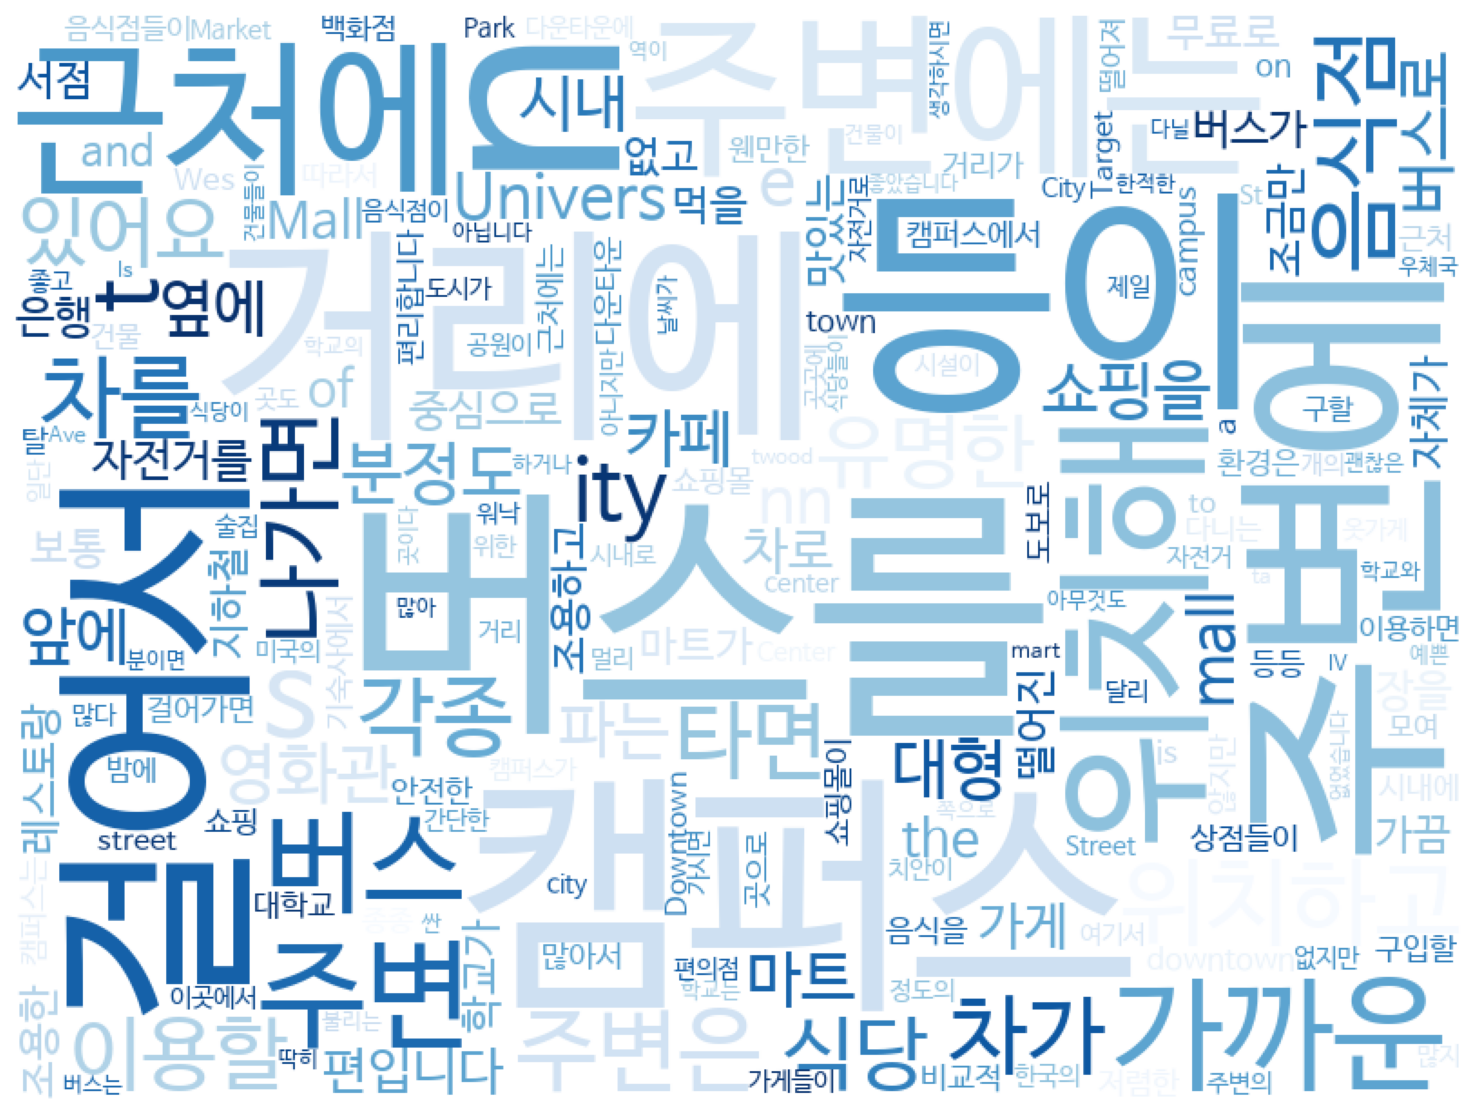

In [55]:
wordcloud.generate_from_frequencies(frequencies = common_keywords) # mecab으로 추출한 명사로 워드클라우드를 그린다.
plt.figure(figsize = (15 , 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
#이래서 전체 스탑워드 뽑은 다음에 각 학교에서 유니크한 거만 정리하는 식으로 하는 거..? 
#아니면 그냥 좋은 거에 대한 대학 0이랑 1 나눠서 그 대학들 키워드만 모아서 알아보기 그 때 그 때 스탑워드 처리.

In [53]:
word_list, frequency_list = map(list, zip(*common_gen_words))
word_list[:10]

['있습니다', '수', '있는', '때문에', '는', '많이', '매우', '학교', '큰', '분']

In [47]:
# https://github.com/lovit/soynlp
from soynlp.noun import LRNounExtractor

In [48]:
from soynlp.noun import LRNounExtractor
noun_extractor = LRNounExtractor()
nouns = noun_extractor.train_extract(keywords)

[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded
[Noun Extractor] scanning was done (L,R) has (387, 226) tokens
[Noun Extractor] building L-R graph was done
[Noun Extractor] 58 nouns are extracted


In [59]:
nouns_counted = Counter(nouns)
print("no. gen words:", len(nouns_counted))
common_nouns = nouns_counted.most_common(100)
common_nouns #왜 숫자가 적고 정확도는 높은지 #fillna 해버려서?

no. gen words: 58


[('학교',
  NounScore_v1(frequency=140, score=0.7192192978723405, known_r_ratio=0.9591836734693877)),
 ('대학',
  NounScore_v1(frequency=130, score=0.500998129032258, known_r_ratio=0.484375)),
 ('주변',
  NounScore_v1(frequency=96, score=0.5758527916666667, known_r_ratio=0.972972972972973)),
 ('도시',
  NounScore_v1(frequency=61, score=0.8981951851851852, known_r_ratio=0.75)),
 ('위치',
  NounScore_v1(frequency=57, score=0.996608203703704, known_r_ratio=1.0)),
 ('시내',
  NounScore_v1(frequency=28, score=0.9859656666666669, known_r_ratio=0.9545454545454546)),
 ('근처',
  NounScore_v1(frequency=28, score=0.9186525999999999, known_r_ratio=1.0)),
 ('식당',
  NounScore_v1(frequency=24, score=0.8388491, known_r_ratio=0.7142857142857143)),
 ('거리',
  NounScore_v1(frequency=24, score=0.8191800555555556, known_r_ratio=1.0)),
 ('기숙사',
  NounScore_v1(frequency=23, score=0.7652077500000002, known_r_ratio=1.0)),
 ('마트',
  NounScore_v1(frequency=22, score=0.55272625, known_r_ratio=0.8888888888888888)),
 ('중심',
  No

In [49]:
noun_extractor.lrgraph.get_r('환경')

[('은', 9), ('', 5), ('이', 3), ('을', 2), ('입니다', 1), ('이라고', 1)]

In [53]:
noun_extractor.lrgraph.get_l('거리')

[('놀', 3), ('분', 1), ('먹', 1)]

In [56]:
from soynlp.noun import LRNounExtractor_v2

noun_extractor = LRNounExtractor_v2(verbose=True)
#noun_extractor.train(sents)
#nouns = noun_extractor.extract()
nouns_eo = noun_extractor.train_extract(keywords)

[Noun Extractor] use default predictors
[Noun Extractor] num features: pos=3929, neg=2321, common=107
[Noun Extractor] counting eojeols
[EojeolCounter] n eojeol = 2546 from 3984 sents. mem=0.219 Gb                    
[Noun Extractor] complete eojeol counter -> lr graph
[Noun Extractor] has been trained. #eojeols=3984, mem=0.224 Gb
[Noun Extractor] batch prediction was completed for 889 words
[Noun Extractor] checked compounds. discovered 16 compounds
[Noun Extractor] postprocessing detaching_features : 314 -> 310
[Noun Extractor] postprocessing ignore_features : 310 -> 301
[Noun Extractor] postprocessing ignore_NJ : 301 -> 299
[Noun Extractor] 299 nouns (16 compounds) with min frequency=1
[Noun Extractor] flushing was done. mem=0.226 Gb                    
[Noun Extractor] 52.71 % eojeols are covered


In [57]:
list(noun_extractor._compounds_components.items())[:50]

[('시골동네', ('시골', '동네')),
 ('거주지역', ('거주', '지역')),
 ('버스정류장', ('버스', '정류장')),
 ('교외지역', ('교외', '지역')),
 ('구성되어', ('구성', '되어')),
 ('학교건물', ('학교', '건물')),
 ('대학건물', ('대학', '건물')),
 ('학교캠퍼스', ('학교', '캠퍼스')),
 ('외곽지역', ('외곽', '지역')),
 ('도시전체', ('도시', '전체')),
 ('우리나라', ('우리', '나라')),
 ('연결되어', ('연결', '되어')),
 ('학교도시', ('학교', '도시')),
 ('강이하나', ('강이', '하나')),
 ('존재하나', ('존재', '하나')),
 ('시내버스', ('시내', '버스'))]

In [60]:
print((nouns['마트'])) 

NounScore_v1(frequency=22, score=0.55272625, known_r_ratio=0.8888888888888888)


In [ ]:
%time df_tokens = df_column.apply(tokenizer.tokenize)